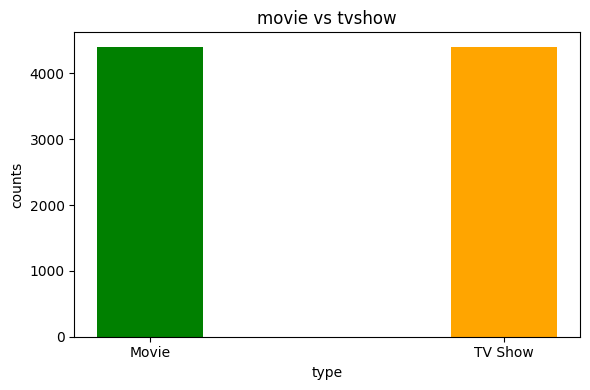

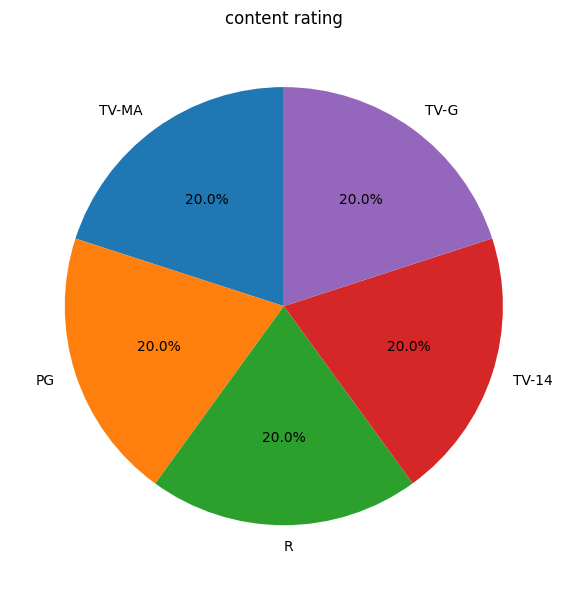

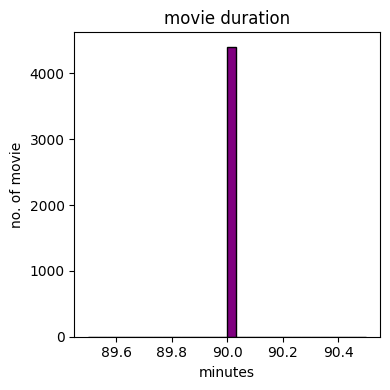

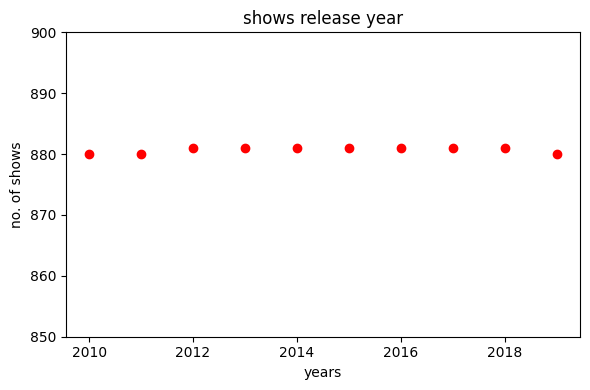

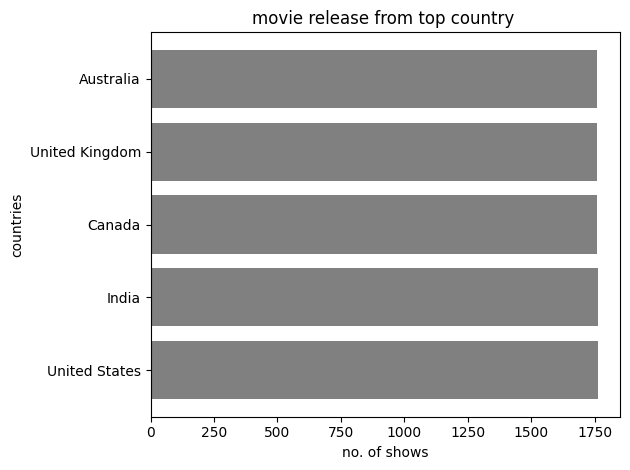

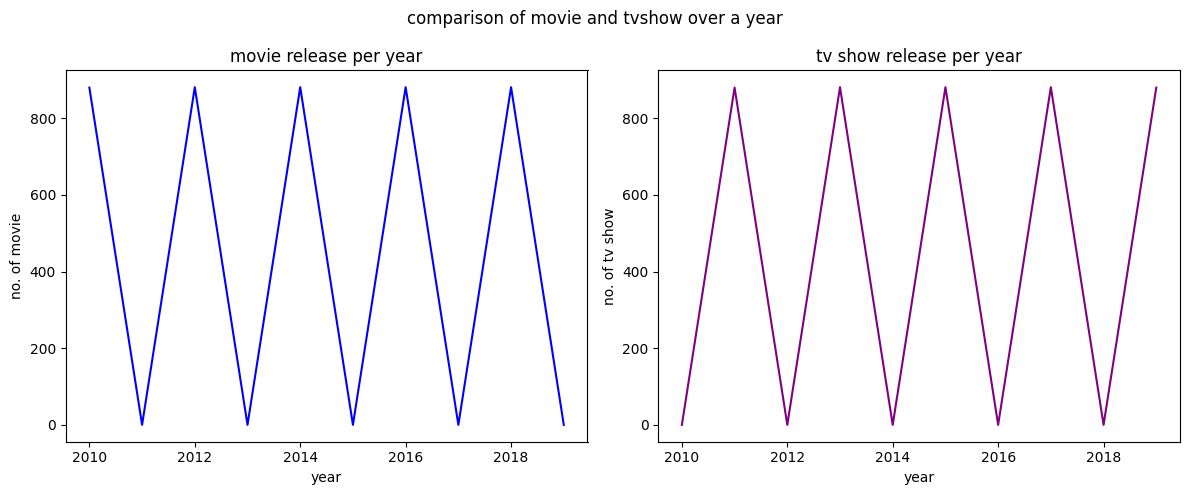

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('netflix_titles_full_simulated.csv')

# print(df.head())
df=df.dropna(subset=['type','release_year','rating','country','duration'])


type_count=df['type'].value_counts()
# print(type_count)
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=['green','orange'],width=.3)
plt.title('movie vs tvshow')
plt.xlabel('type')
plt.ylabel('counts')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
rating_count=df['rating'].value_counts()
plt.pie(rating_count.values,labels=rating_count.index,autopct='%1.1f%%',startangle=90)
plt.title('content rating')
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,4))
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)
plt.hist(movie_df['duration_int'],bins=30,edgecolor='black',color='purple')
plt.title('movie duration')
plt.xlabel('minutes')
plt.ylabel('no. of movie')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
release_count=df['release_year'].value_counts().sort_index()
plt.scatter(release_count.index,release_count.values,color='red')
plt.title('shows release year')
plt.xlabel('years')
plt.ylim(850,900)
plt.ylabel('no. of shows')
plt.tight_layout()
plt.show()


country_count=df['country'].value_counts().head(10)
plt.barh(country_count.index,country_count.values,color='grey')
plt.title('movie release from top country ')
plt.xlabel('no. of shows')
plt.ylabel('countries')
plt.tight_layout()
plt.show()


content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax=plt.subplots(1,2,figsize=(12,5))

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title("movie release per year")
ax[0].set_xlabel('year')
ax[0].set_ylabel('no. of movie')


ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='purple')
ax[1].set_title('tv show release per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('no. of tv show')

fig.suptitle('comparison of movie and tvshow over a year')

plt.tight_layout()
plt.show()
